**Columns explaination:**

- Country: Country
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df=df.replace({'Developing':0,'Developed':1})

<ipython-input-10-29138c917566>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'Developing':0,'Developed':1})


In [ ]:
df.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1602,Maldives,2015,0,78.5,61.0,0,NaN,0.000000,99.0,0,...,99.0,NaN,99.0,0.1,8395.785198,49163.0,13.6,13.6,0.701,12.7
1984,Papua New Guinea,2006,0,68.0,299.0,11,0.64,126.614214,71.0,1,...,67.0,5.92,72.0,1.5,854.346921,647272.0,1.4,1.4,0.454,8.2
1463,Lebanon,2010,0,74.9,94.0,1,1.58,805.395635,81.0,12,...,75.0,7.19,81.0,0.1,8763.826274,4337141.0,4.7,4.7,0.752,13.3
1872,Nicaragua,2004,0,71.0,194.0,4,3.81,36.816212,79.0,0,...,8.0,6.13,79.0,0.3,191.551570,53973.0,2.1,2.0,0.587,11.0
1452,Latvia,2005,1,76.0,216.0,0,9.92,86.925540,99.0,2,...,99.0,6.37,99.0,0.1,7558.742600,2238799.0,2.5,2.5,0.791,15.9
1576,Malawi,2009,0,51.5,491.0,36,1.16,7.915071,93.0,21,...,93.0,1.18,93.0,14.9,42.737966,1471462.0,6.9,6.8,0.415,9.9
1263,Ireland,2002,1,77.4,88.0,0,14.17,5092.383814,NaN,243,...,83.0,6.85,83.0,0.1,32539.193700,3931947.0,0.3,0.3,0.862,16.5
2660,Trinidad and Tobago,2004,0,69.4,19.0,0,5.82,11.851001,94.0,0,...,94.0,5.22,94.0,1.0,129.519140,129535.0,6.3,6.8,0.736,12.2
2719,Uganda,2010,0,58.4,362.0,79,10.03,116.202964,8.0,1313,...,79.0,11.20,8.0,8.0,594.997256,33915133.0,6.0,6.0,0.473,10.9
936,France,2009,0,81.1,88.0,3,11.80,6415.357350,51.0,1541,...,98.0,11.28,98.0,0.1,41631.131410,647744.0,0.6,0.6,0.879,16.0


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
new_df=df.drop(['Country','Year','Status'],axis=1)
new_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<Axes: >

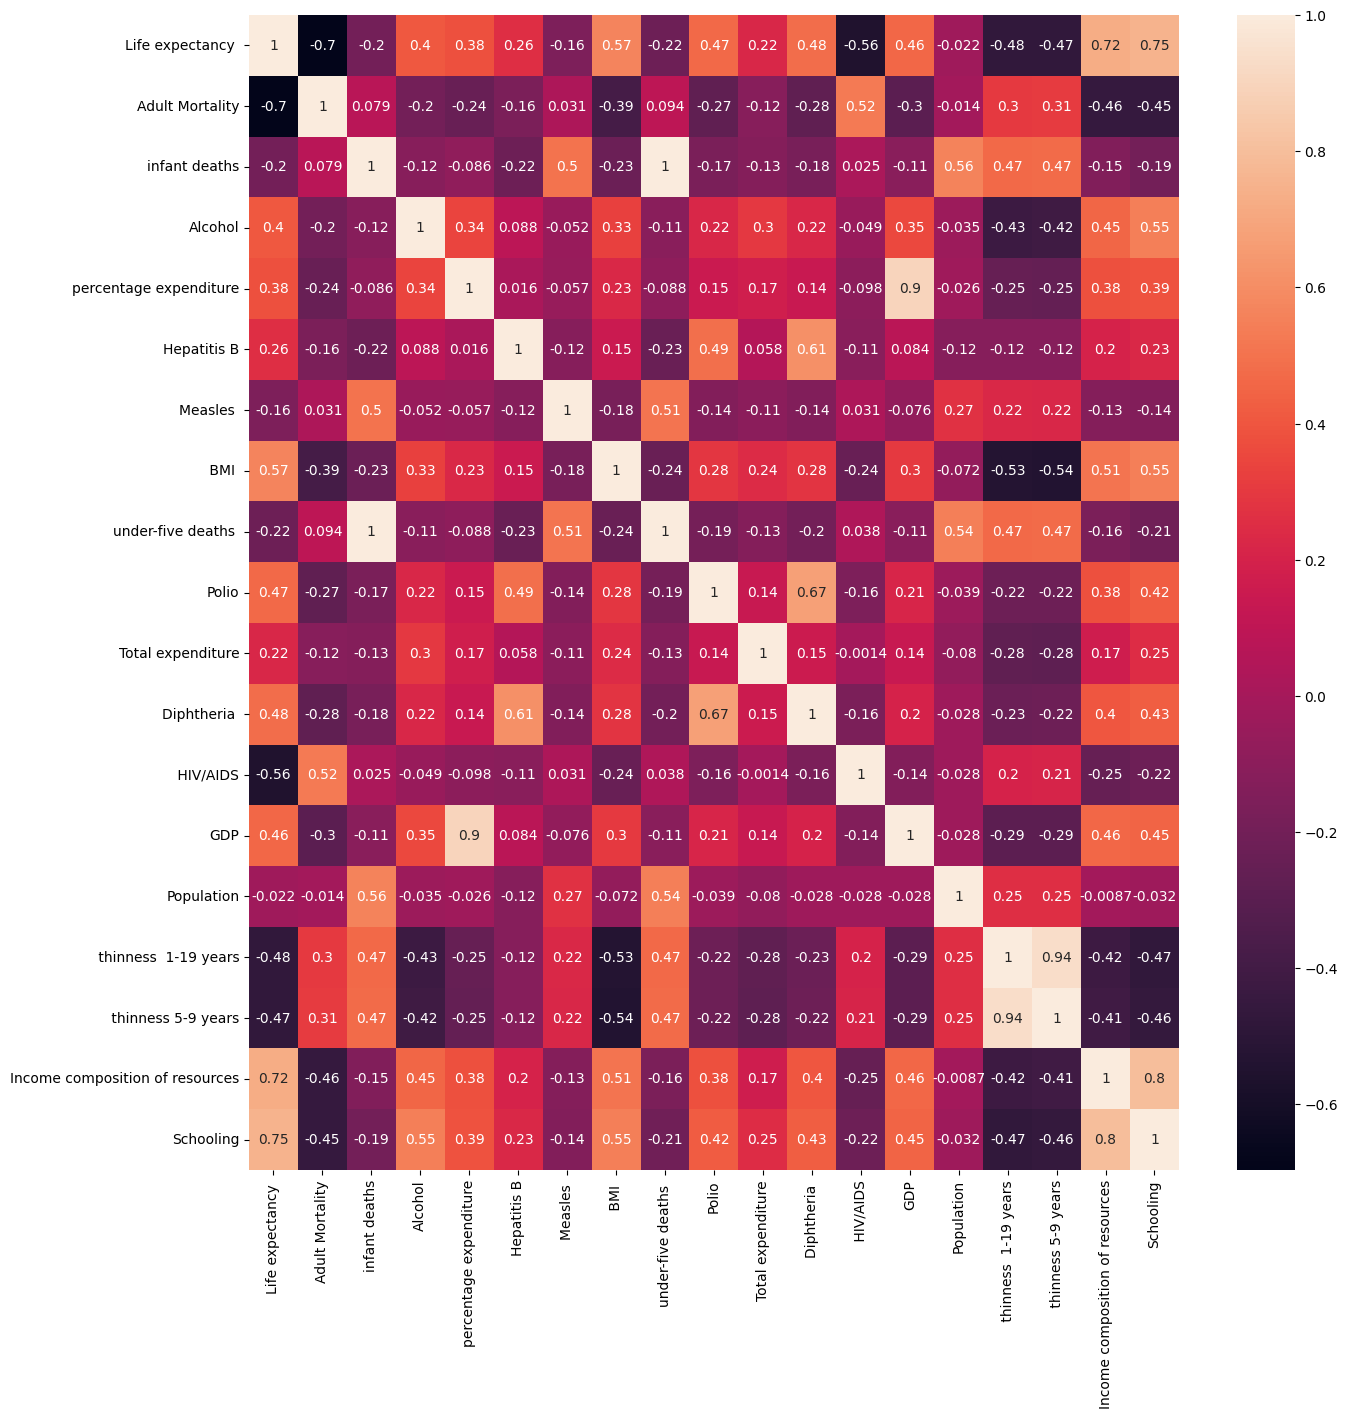

In [ ]:
figure=plt.figure(figsize=(15,15))
sns.heatmap(new_df.corr(),annot=True)

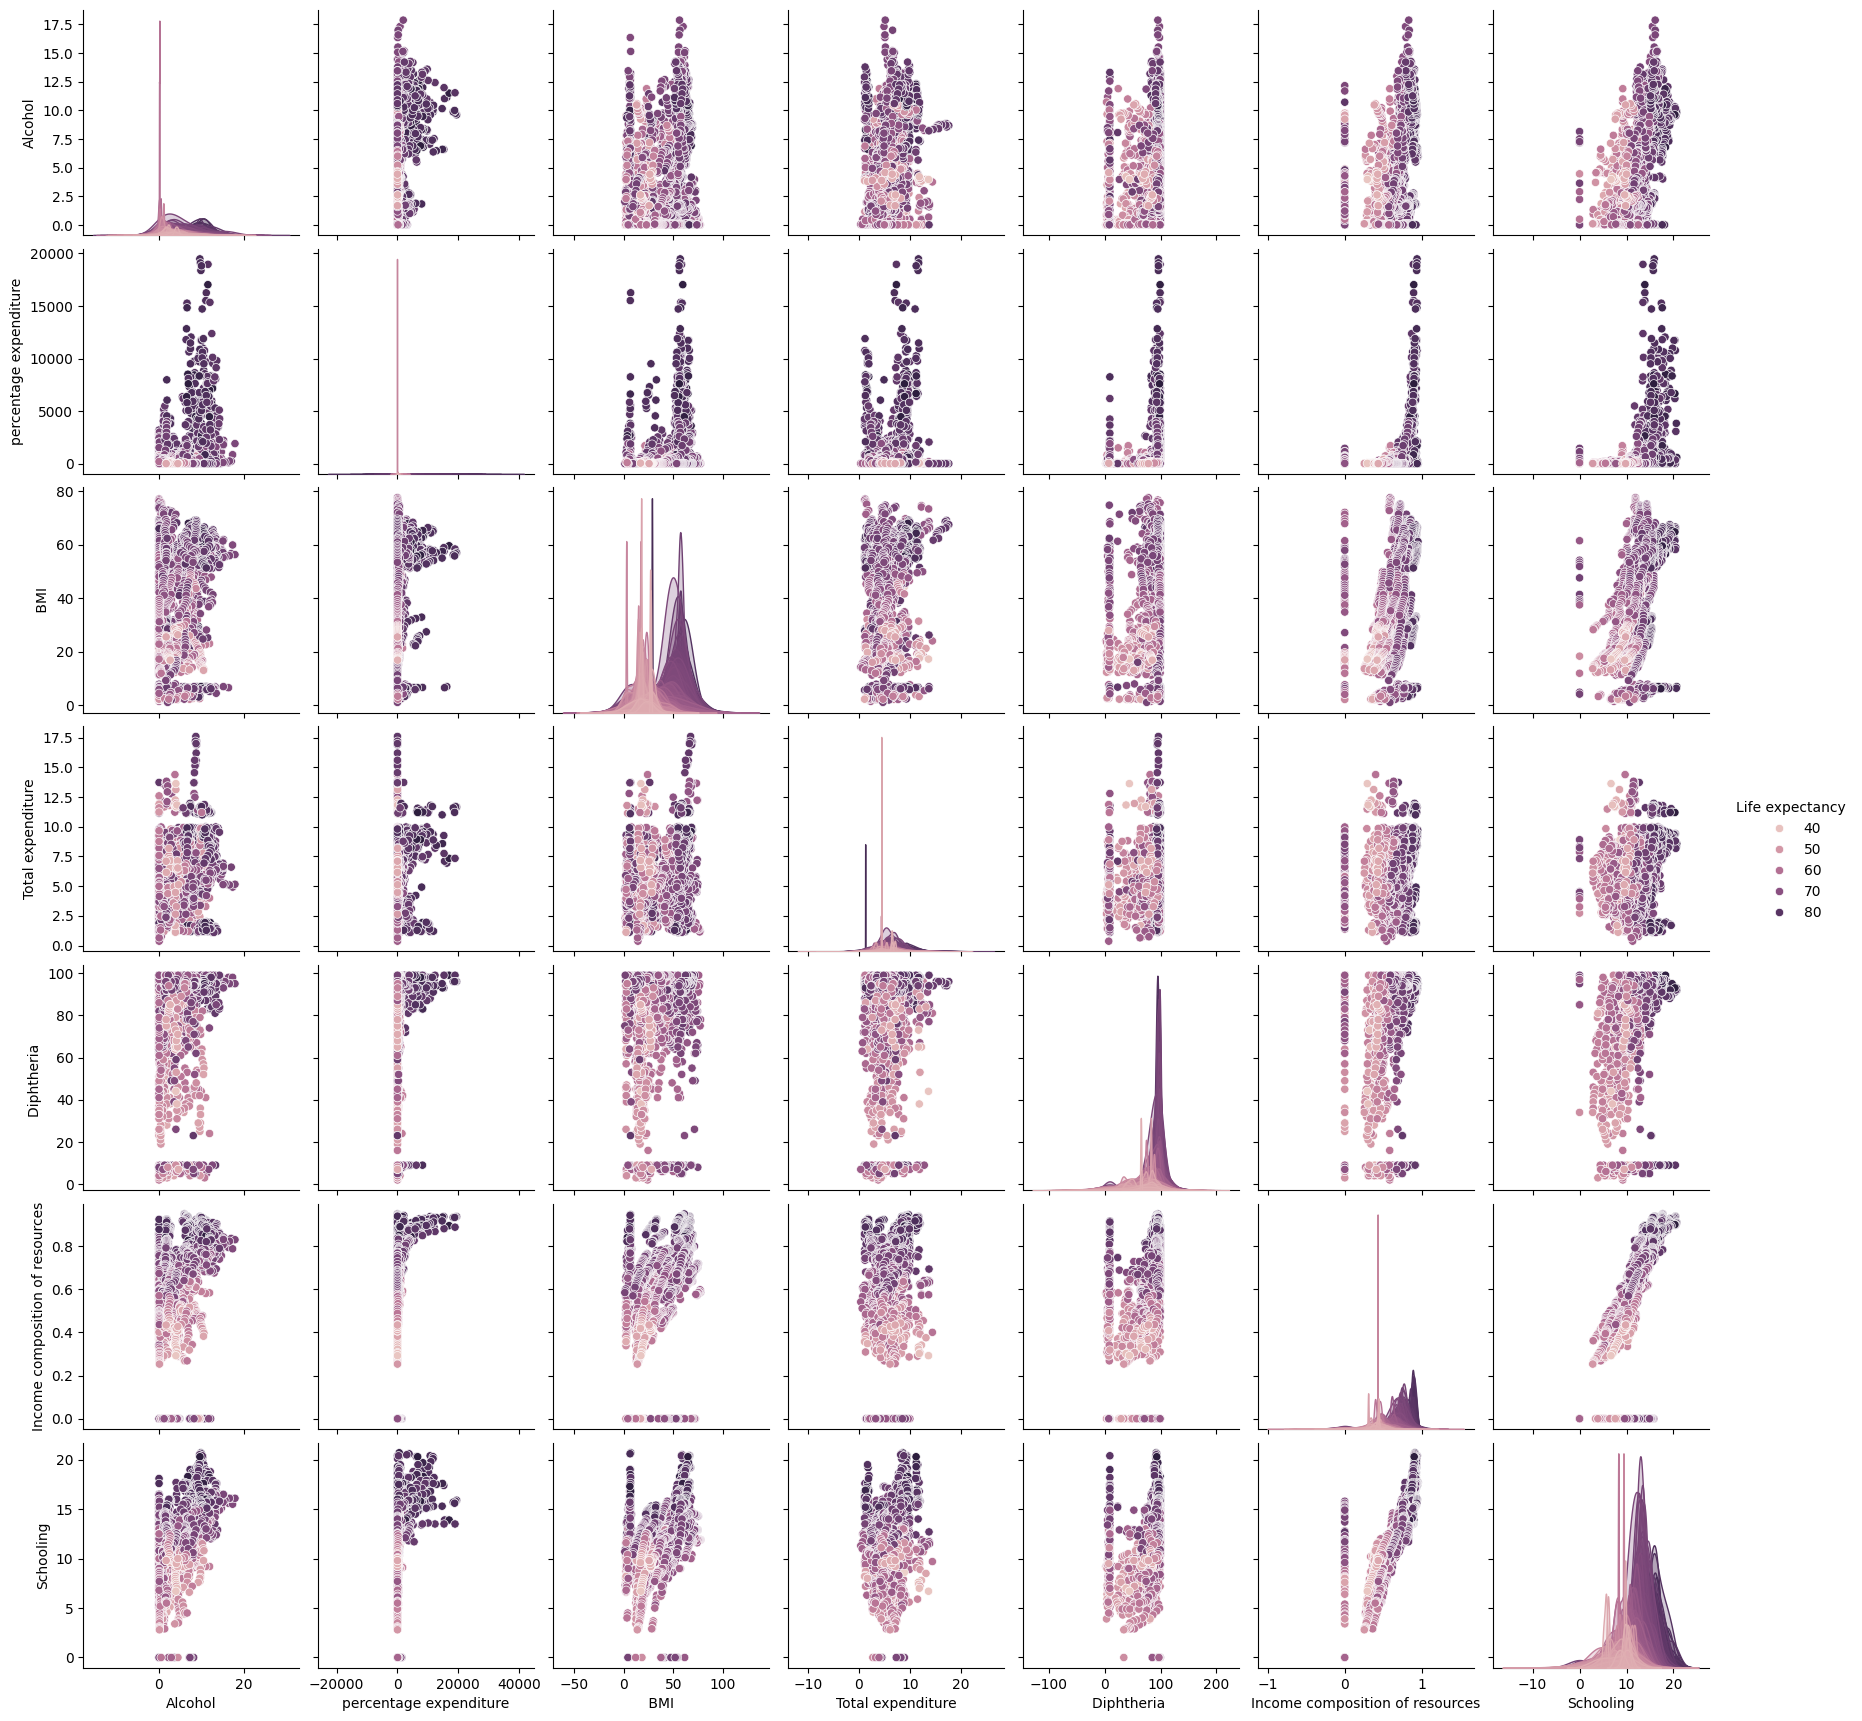

In [ ]:
# data = new_df[[
#     'Life expectancy','Alcohol',
#     'percentage expenditure','BMI',
#     'total expenditure','Dephtheria',
#     'Income composition of resources','Schooling'
# ]]

# sns.pairplot(data, hue='Life expectancy ')  # Verify the exact column name in your DataFrame
# plt.show()
data = new_df[[
    'Life expectancy ', 'Alcohol',  # Added a space after 'Life expectancy'
    'percentage expenditure', ' BMI ',  # Added spaces around 'BMI'
    'Total expenditure', 'Diphtheria ',  # Changed 'total expenditure' to 'Total expenditure' and added a space after 'Diphtheria'
    'Income composition of resources', 'Schooling'
]]

sns.pairplot(data, hue='Life expectancy ')  # Verify the exact column name in your DataFrame
plt.show()

How does Infant and Adult mortality rates affect life expectancy?

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>

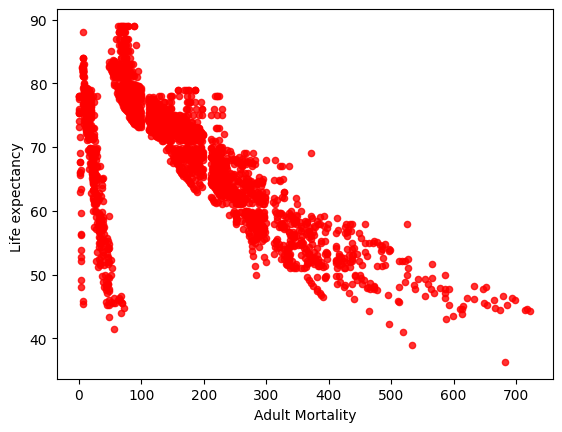

In [ ]:
df.plot(kind='scatter',x='Adult Mortality',y='Life expectancy ',alpha=0.8,color='red')

<Axes: xlabel='infant deaths', ylabel='Life expectancy '>

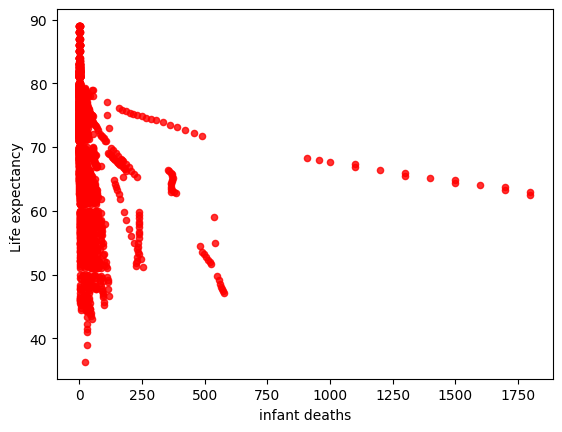

In [ ]:
df.plot(kind='scatter',x='infant deaths',y='Life expectancy ',alpha=0.8,color='red')

<Axes: xlabel='Schooling', ylabel=' HIV/AIDS'>

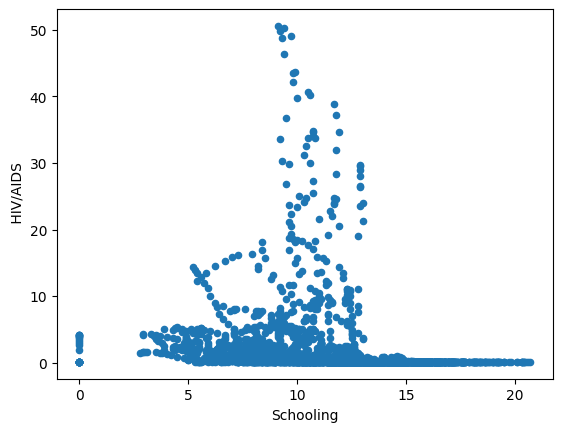

In [ ]:
df.plot(kind='scatter', x='Schooling', y=' HIV/AIDS')

In [ ]:
df['Schooling'].value_counts()

,count
Schooling,
12.9,58
13.3,52
12.5,49
12.8,46
12.3,44
...,...
20.7,1
19.8,1
3.4,1


In [ ]:
df['Schooling'].fillna(df['Schooling'].mean(),inplace=True)

<ipython-input-55-3259fcbb45ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Schooling'].fillna(df['Schooling'].mean(),inplace=True)


In [ ]:
df['Schooling'].value_counts().sum()

2938

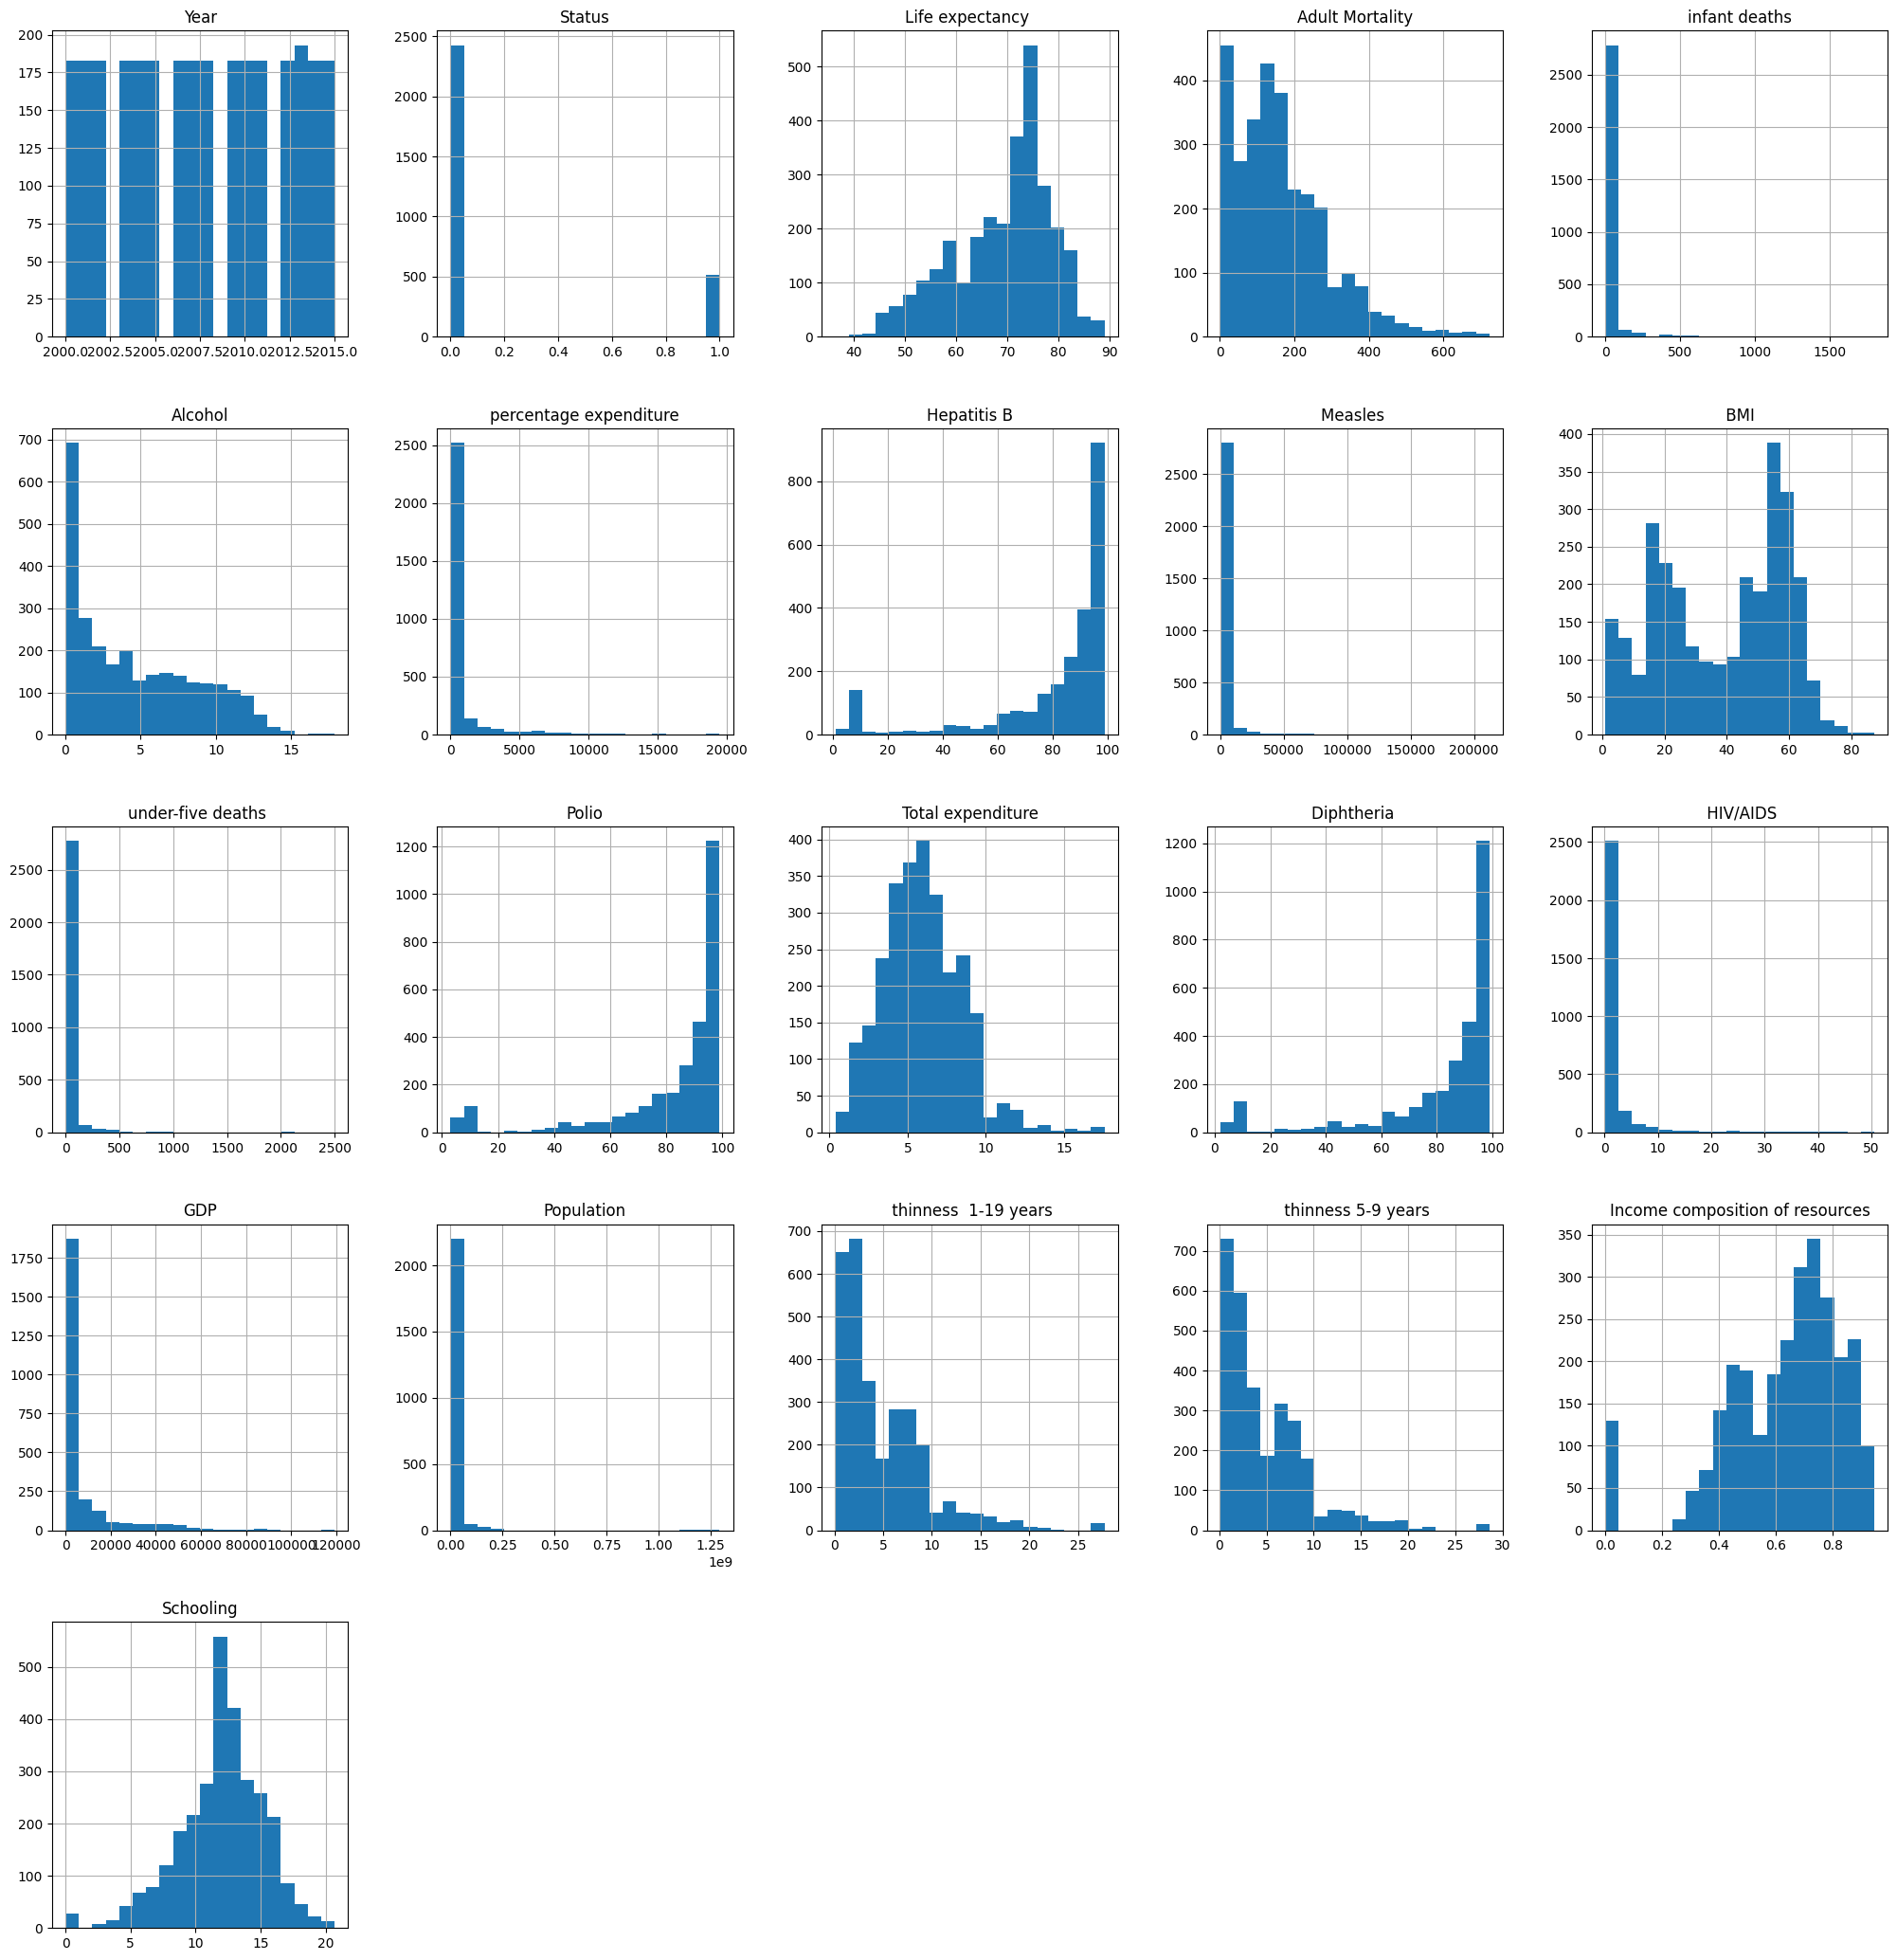

In [ ]:
df.hist(bins=20, figsize=(25,26))
plt.show()

**Model Integration**
- Train Test split , StandardScalaing , Imputation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error



In [ ]:
X=df.drop(['Life expectancy ','Country','Year','Status'],axis=1)
y=df['Life expectancy ']
print(X)

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0               263.0             62     0.01               71.279624   
1               271.0             64     0.01               73.523582   
2               268.0             66     0.01               73.219243   
3               272.0             69     0.01               78.184215   
4               275.0             71     0.01                7.097109   
...               ...            ...      ...                     ...   
2933            723.0             27     4.36                0.000000   
2934            715.0             26     4.06                0.000000   
2935             73.0             25     4.43                0.000000   
2936            686.0             25     1.72                0.000000   
2937            665.0             24     1.68                0.000000   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  \
0            65.0      1154   19.1                  83    

In [ ]:
print(y)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [ ]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
X_train

array([[-0.31796474, -0.25751384,  0.17023914, ...,  0.7054402 ,
        -0.14014772, -0.03879636],
       [-0.11037469, -0.25751384, -0.19417176, ...,  0.9954941 ,
        -0.3328948 , -0.31547383],
       [-0.18223278, -0.25751384,  1.4469168 , ..., -0.12009782,
         0.49109899,  0.26862305],
       ...,
       [ 0.79982784, -0.1054732 ,  0.368558  , ..., -0.14240965,
        -0.83403723, -1.1147643 ],
       [-0.74911331, -0.23962671,  1.16679141, ..., -0.96794767,
         1.01151612,  1.03717157],
       [-1.05251415, -0.19490887, -0.87341385, ...,  1.04011778,
        -3.04099137, -2.03702253]])

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
y_train=imputer.fit_transform(y_train.values.reshape(-1,1))
y_test=imputer.transform(y_test.values.reshape(-1,1))

In [ ]:
model=LinearRegression()


In [ ]:
model.fit(X_train,y_train)

LinearRegression()

R² Score , Adjusted R² Score

In [ ]:
cross_val=model.score(X_train,y_train)
print(cross_val)

0.8158890770593319


In [ ]:
print(1-(1-cross_val)*(2938-1)/(2938-18-1))

0.8147537579045077


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([[67.15773376],
       [76.69697748],
       [75.87526065],
       [78.23645797],
       [46.76898775],
       [50.07360735],
       [67.66256492],
       [71.16410448],
       [74.97801754],
       [54.91563385],
       [51.93679052],
       [63.66642756],
       [64.94905779],
       [70.51993804],
       [70.69506412],
       [63.09666775],
       [55.42711575],
       [80.50722087],
       [69.03687045],
       [81.08865492],
       [81.23345898],
       [83.99019312],
       [70.83634005],
       [69.21132565],
       [70.19035907],
       [68.4665753 ],
       [60.8013782 ],
       [61.00744806],
       [78.02754127],
       [71.83248428],
       [66.22116623],
       [75.97662104],
       [69.0256291 ],
       [68.81089002],
       [80.5538936 ],
       [58.19892069],
       [66.93467538],
       [72.82730292],
       [62.33900518],
       [76.42794361],
       [57.33841178],
       [63.76317532],
       [75.25733117],
       [80.93828307],
       [76.4022128 ],
       [57

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(r2)
print(rmse)

15.376246795359606
2.8626628709128163
0.822517655769367
3.9212557676539803


In [ ]:
print(1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test[1]-1))

[0.82264509 0.82259548 0.82197358 0.82238822 0.82251766 0.82257811
 0.82222274 0.8225969  0.82234525 0.8223954  0.82234433 0.82261448
 0.82243282 0.82258342 0.82272346 0.82272238 0.82229605 0.82234332]


In [ ]:
print(model.coef_)
print(model.intercept_)

[[ -2.65749988  10.82760949   0.47953266   0.23079354  -0.42454487
   -0.27802978   0.7921384  -10.99212305   0.65345154   0.14991466
    0.95950075  -2.42965042   0.52659947  -0.0572565   -0.43559489
    0.0312992    1.37185049   2.11469478]]
[69.27715628]
